# Data Collection

In [75]:
import pandas as pd
import os 
file = "/data/steam_games.csv"
file = os.getcwd() + file
#read in 8 rows from the .csv file
#raw_steam_data = pd.read_csv(file, nrows=8000)

#rather than read a set amount we read all so we can remove non apps and then limit to 8000
raw_steam_data = pd.read_csv(file)

raw_steam_data

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7,

# Data Cleaning

In [76]:
#remove all non apps from the dataframe
for i in range(0, raw_steam_data['types'].size):
    if raw_steam_data['types'][i] != 'app':
        #remove the row at index
        #this means if index 5 is removed there is no longer an index 5 in the data frame 
        # so it would go stright from 4 to 6
        raw_steam_data = raw_steam_data.drop([i])

In [77]:
#reset index in the dataframe so there is no longer missing indexes
# and then reduce the data frame size to 8000

#create a range from  to the max amount of games we will use
myrange = range(0, 8000)

#restet index so there is no longer missing indexes
raw_steam_data.reset_index(drop=True, inplace=True)
#reduce size of data frame to 8000
raw_steam_data = raw_steam_data[:8000]

raw_steam_data

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,https://store.steampowered.com/app/391040/F1_2...,app,F1 2016,Create your own legend in F1™ 2016. Get ready ...,NaN,"Very Positive,(2,458),- 82% of the 2,458 user ...","Aug 18, 2016","Codemasters,Feral Interactive (Mac)","Codemasters,Feral Interactive (Mac),Codemaster...","Racing,Simulation,Sports,Multiplayer,Singlepla...","Single-player,Multi-player,Steam Achievements,...","English,French,Italian,German,Spanish - Spain,...",49.0,"Racing,Simulation,Sports"

In [78]:
#purging unwanted features
purged_steam_data = raw_steam_data.drop(columns=['types', 'desc_snippet', 'achievements','game_description', 'minimum_requirements', 'recommended_requirements'])
purged_steam_data.iloc[5]

url               https://store.steampowered.com/app/601150/Devi...
name                                                Devil May Cry 5
recent_reviews    Very Positive,(408),- 87% of the 408 user revi...
all_reviews       Very Positive,(9,645),- 92% of the 9,645 user ...
release_date                                            Mar 7, 2019
developer                                          CAPCOM Co., Ltd.
publisher                         CAPCOM Co., Ltd.,CAPCOM Co., Ltd.
popular_tags      Action,Hack and Slash,Great Soundtrack,Demons,...
game_details      Single-player,Online Multi-Player,Online Co-op...
languages         English,French,Italian,German,Spanish - Spain,...
genre                                                        Action
mature_content     Mature Content Description  The developers de...
original_price                                               $59.99
discount_price                                               $70.42
Name: 5, dtype: object

In [79]:
#scrape the review data to collect the scores as an integers
#scrape the amount of reviews to store as integers
import re
import math
amount_p = re.compile(r'\d+(,\d+)*')
value_p = re.compile(r'\d+')

def process_review(review):
    if isinstance(review, str) :
        str_num = amount_p.search(review).group()
        nums = value_p.findall(str_num)
        amt = 0
        if 1 < len(nums):
            for i in range(0, len(nums) - 1):
                prev = nums[i + 1]
                power = len(prev)
                prev = int(prev)
                amt += int(nums[i])*(10**power) + prev
                
        else:
            amt = nums[0]
        
        all_nums = value_p.findall(review)
        if 2 < len(all_nums):
            val = all_nums[len(nums)]
        else:
            val = -1
            
        return [amt, val]
    else: 
        return []
    
def get_element(nums, index):
    if index < len(nums):
        return int(nums[index])
    else:
        return 0

recent_review_numbers = purged_steam_data.apply(lambda x: process_review(x['recent_reviews']), axis=1)
recent_review_numbers


purged_steam_data['amt_rec_revs'] = recent_review_numbers.apply(lambda x: get_element(x, 0))
purged_steam_data['rec_rev_score'] = recent_review_numbers.apply(lambda x: get_element(x, 1))

alltime_review_numbers = purged_steam_data.apply(lambda x: process_review(x['all_reviews']), axis=1)

purged_steam_data['amt_all_revs'] = alltime_review_numbers.apply(lambda x: get_element(x, 0))
purged_steam_data['all_rev_score'] = alltime_review_numbers.apply(lambda x: get_element(x, 1))

purged_steam_data = purged_steam_data.drop(columns=['recent_reviews','all_reviews'])

#keys for new columns:
#'amt_rec_revs' -> the amount of recent reviews
#'rec_rev_score' -> the percentage of the recent reviews
#'amt_all_revs' -> the amount of all reviews
#'all_rev_score' - > the perceent of all reviews

purged_steam_data

,url,name,release_date,developer,publisher,popular_tags,game_details,languages,genre,mature_content,original_price,discount_price,amt_rec_revs,rec_rev_score,amt_all_revs,all_rev_score
0,https://store.steampowered.com/app/379720/DOOM/,DOOM,"May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,NaN,$19.99,$14.99,554,89,42550,92
1,https://store.steampowered.com/app/578080/PLAY...,PLAYERUNKNOWN'S BATTLEGROUNDS,"Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",Mature Content Description The developers de...,$29.99,NaN,6214,49,836608,49
2,https://store.steampowered.com/app/637090/BATT...,BATTLETECH,"Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",NaN,$39.99,NaN,166,54,7030,71
3,https://store.steampowered.com/app/221100/DayZ/,DayZ,"Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",NaN,$44.99,NaN,932,57,167115,61
4,https://store.steampowered.com/app/8500/EVE_On...,EVE Online,"May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",NaN,Free,NaN,287,54,11481,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,https://store.steampowered.com/app/391040/F1_2...,F1 2016,"Aug 18, 2016","Codemasters,Feral Interactive (Mac)","Codemasters,Feral Interactive (Mac),Codemaster...","Racing,Simulation,Sports,Multiplayer,Singlepla...","Single-player,Multi-player,Steam Achievements,...","English,French,Italian,German,Spanish - Spain,...","Racing,Simulation,Sports",NaN,$59.99,$707.84,0,0,2458,82
7996,https://store.steampowered.com/app/208500/F1_2...,F1 2012™,"Sep 17, 2012",Codemasters Birmingham,"Codemasters,Codemasters","Racing,Simulation,Sports,Realistic,Multiplayer...","Single-player,Multi-player,Co-op,Steam Achieve...","English,German,French,Italian,Spanish - Spain,...","Racing,Simulation,Sports",NaN,$19.99,$707.84,18,83,910,87
7997,https://store.steampowered.com/app/40930/The_M...,The Misadventures of P.B. Winterbottom,"Apr 20, 2010",The Odd Gentlemen,"2K,2K","Indie,Puzzle,Platformer,Adventure,Time Manipul...","Single-player,Steam Achievements,Partial Contr...","English,French,German,Italian,Spanish - Spain","Adventure,Indie",NaN,$4.99,NaN,0,0,307,88
7998,https://store.steampowered.com/app/360650/12_L...,12 Labours of Hercules III: Girl Power,"Aug 7, 2015","Jetdogs Studios,Zoom Out Games","Jetdogs Studios,Jetdogs Studios","Casual,Strategy,Time Management,Singleplayer,M...","Single-player,Steam Achievements,Steam Trading...","English,French,German,Russian,Italian,Spanish ...","Casual,Strategy",NaN,$2.99,$16.73,0,0,674,87


In [80]:
#convert price columns into floats
import functools 

def handle_prices(price):
    if isinstance(price, str):
        prices = value_p.findall(price)
        if len(prices):
            price = float(prices[0]) 
            if 1 < len(prices):
                price += float(prices[1])/100
            return price
        else:
            return 0
    else:
        return -1 #return nan

purged_steam_data['original_price'] = purged_steam_data.apply(lambda x: handle_prices(x['original_price']), axis=1)
purged_steam_data['discount_price'] = purged_steam_data.apply(lambda x: handle_prices(x['discount_price']), axis=1)


#value_p.findall(purged_steam_data['original_price'][4])

In [81]:
from collections import Counter 

#the publisher feature for all the games have the publishers name repeated twice
#the function below is to remove the duplicated publisher name
#input is a single string from the publisher feature such as "Bethesda Softworks, Bethesda Softworks"
#sometimes input is and empty string
def remove_duplicates(input): 
    
    #check publisher is not an empty string
    if (input != '' and isinstance(input, str)):
        
        #split input string separated by space as the publisher names have a comma inbetween them
        #input is now two strings in an array such as ['Bethesda Softworks', 'Bethesda Softworks']
        input = input.split(",") 
        
        #return the first string the the input array such as 'Bethesda Softwork'
        return input[0]
    
    else:
        #when a non string is found return "No Publisher"
        return "No Publisher"
    
#go through each game and remove the repeated publisher name in their publisher feature
purged_steam_data['publisher'] = purged_steam_data.apply(lambda x: remove_duplicates(x['publisher']), axis=1)

purged_steam_data

,url,name,release_date,developer,publisher,popular_tags,game_details,languages,genre,mature_content,original_price,discount_price,amt_rec_revs,rec_rev_score,amt_all_revs,all_rev_score
0,https://store.steampowered.com/app/379720/DOOM/,DOOM,"May 12, 2016",id Software,Bethesda Softworks,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,NaN,19.99,14.99,554,89,42550,92
1,https://store.steampowered.com/app/578080/PLAY...,PLAYERUNKNOWN'S BATTLEGROUNDS,"Dec 21, 2017",PUBG Corporation,PUBG Corporation,"Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",Mature Content Description The developers de...,29.99,-1.00,6214,49,836608,49
2,https://store.steampowered.com/app/637090/BATT...,BATTLETECH,"Apr 24, 2018",Harebrained Schemes,Paradox Interactive,"Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",NaN,39.99,-1.00,166,54,7030,71
3,https://store.steampowered.com/app/221100/DayZ/,DayZ,"Dec 13, 2018",Bohemia Interactive,Bohemia Interactive,"Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",NaN,44.99,-1.00,932,57,167115,61
4,https://store.steampowered.com/app/8500/EVE_On...,EVE Online,"May 6, 2003",CCP,CCP,"Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",NaN,0.00,-1.00,287,54,11481,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,https://store.steampowered.com/app/391040/F1_2...,F1 2016,"Aug 18, 2016","Codemasters,Feral Interactive (Mac)",Codemasters,"Racing,Simulation,Sports,Multiplayer,Singlepla...","Single-player,Multi-player,Steam Achievements,...","English,French,Italian,German,Spanish - Spain,...","Racing,Simulation,Sports",NaN,59.99,707.84,0,0,2458,82
7996,https://store.steampowered.com/app/208500/F1_2...,F1 2012™,"Sep 17, 2012",Codemasters Birmingham,Codemasters,"Racing,Simulation,Sports,Realistic,Multiplayer...","Single-player,Multi-player,Co-op,Steam Achieve...","English,German,French,Italian,Spanish - Spain,...","Racing,Simulation,Sports",NaN,19.99,707.84,18,83,910,87
7997,https://store.steampowered.com/app/40930/The_M...,The Misadventures of P.B. Winterbottom,"Apr 20, 2010",The Odd Gentlemen,2K,"Indie,Puzzle,Platformer,Adventure,Time Manipul...","Single-player,Steam Achievements,Partial Contr...","English,French,German,Italian,Spanish - Spain","Adventure,Indie",NaN,4.99,-1.00,0,0,307,88
7998,https://store.steampowered.com/app/360650/12_L...,12 Labours of Hercules III: Girl Power,"Aug 7, 2015","Jetdogs Studios,Zoom Out Games",Jetdogs Studios,"Casual,Strategy,Time Management,Singleplayer,M...","Single-player,Steam Achievements,Steam Trading...","English,French,German,Russian,Italian,Spanish ...","Casual,Strategy",NaN,2.99,16.73,0,0,674,87


In [82]:
#find games that have no popular tags and then change the NaNs to and empty string 
def remove_nans(input):
    
    #check if input is a string (NaN is a number)
    if (isinstance(input, str)):
        #if input is a string just return it
        return input
    else:
        #if not a string return an empty string
        return ""

#go through all the games popular tags and remove the NaNs
purged_steam_data['popular_tags'] = purged_steam_data.apply(lambda x: remove_nans(x['popular_tags']), axis=1)

#go through all the games 'mature content' feature and change to empty to string 
purged_steam_data['mature_content'] = purged_steam_data.apply(lambda x: remove_nans(x['mature_content']), axis=1)

In [83]:
#find number of days since games release relative to today
import datetime
release = datetime.datetime.strptime("May 12, 2016", '%b %d, %Y')
today = datetime.datetime.now()
abs((release - today).days)

1412

# Feature Analysis

In [84]:
purged_steam_data

,url,name,release_date,developer,publisher,popular_tags,game_details,languages,genre,mature_content,original_price,discount_price,amt_rec_revs,rec_rev_score,amt_all_revs,all_rev_score
0,https://store.steampowered.com/app/379720/DOOM/,DOOM,"May 12, 2016",id Software,Bethesda Softworks,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,,19.99,14.99,554,89,42550,92
1,https://store.steampowered.com/app/578080/PLAY...,PLAYERUNKNOWN'S BATTLEGROUNDS,"Dec 21, 2017",PUBG Corporation,PUBG Corporation,"Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",Mature Content Description The developers de...,29.99,-1.00,6214,49,836608,49
2,https://store.steampowered.com/app/637090/BATT...,BATTLETECH,"Apr 24, 2018",Harebrained Schemes,Paradox Interactive,"Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",,39.99,-1.00,166,54,7030,71
3,https://store.steampowered.com/app/221100/DayZ/,DayZ,"Dec 13, 2018",Bohemia Interactive,Bohemia Interactive,"Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",,44.99,-1.00,932,57,167115,61
4,https://store.steampowered.com/app/8500/EVE_On...,EVE Online,"May 6, 2003",CCP,CCP,"Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",,0.00,-1.00,287,54,11481,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,https://store.steampowered.com/app/391040/F1_2...,F1 2016,"Aug 18, 2016","Codemasters,Feral Interactive (Mac)",Codemasters,"Racing,Simulation,Sports,Multiplayer,Singlepla...","Single-player,Multi-player,Steam Achievements,...","English,French,Italian,German,Spanish - Spain,...","Racing,Simulation,Sports",,59.99,707.84,0,0,2458,82
7996,https://store.steampowered.com/app/208500/F1_2...,F1 2012™,"Sep 17, 2012",Codemasters Birmingham,Codemasters,"Racing,Simulation,Sports,Realistic,Multiplayer...","Single-player,Multi-player,Co-op,Steam Achieve...","English,German,French,Italian,Spanish - Spain,...","Racing,Simulation,Sports",,19.99,707.84,18,83,910,87
7997,https://store.steampowered.com/app/40930/The_M...,The Misadventures of P.B. Winterbottom,"Apr 20, 2010",The Odd Gentlemen,2K,"Indie,Puzzle,Platformer,Adventure,Time Manipul...","Single-player,Steam Achievements,Partial Contr...","English,French,German,Italian,Spanish - Spain","Adventure,Indie",,4.99,-1.00,0,0,307,88
7998,https://store.steampowered.com/app/360650/12_L...,12 Labours of Hercules III: Girl Power,"Aug 7, 2015","Jetdogs Studios,Zoom Out Games",Jetdogs Studios,"Casual,Strategy,Time Management,Singleplayer,M...","Single-player,Steam Achievements,Steam Trading...","English,French,German,Russian,Italian,Spanish ...","Casual,Strategy",,2.99,16.73,0,0,674,87


In [85]:
#Check if names can be used as the unqiue identifier

#check the amount of games as all games have a name
raw_steam_data['name'].size #40833 games
#get an array of game names
names = raw_steam_data['name']
#ensure we have all the names
names.size #40833 names (possibly not unique)

#types = raw_steam_data['types']
#types[types.duplicated(keep=False)].size

#example of duplicate names -> unsuitable for unique id
#two games with the name "The Deer"
for i in range(0, raw_steam_data['name'].size):
    if "The Deer" == raw_steam_data['name'][i]:
        print(raw_steam_data.iloc[i])

# Average number of words in each columns cell

Columns used 'developer', 'publisher', 'popular_tags', 'game_details', 'genre'.

In [86]:
#get the average number of words in the 'developer' column
#create a list to conatin seperate words
dev_list = []
#string to help with splitting the data into seperate words
dev_string = ""
#go through all cells
for dev in purged_steam_data['developer']:
    #check the value is a string
    if (isinstance(dev, str)):
        #add string the the large string
        dev_string += dev

#split the string at commas and add to the list
dev_list = str.split(dev_string, ',')

#set large list back to the empty string
dev_string = ""

#re-assemble the list with the new seperated strings
for substring in dev_list:
   dev_string += substring

#split at the spaces and add to the list
dev_list = str.split(dev_string, ' ')

#all words are now split apart and are their own string
#get the average by taking the length of the list of string and dividing it by the amount of cells
dev_average = len(dev_list)/purged_steam_data['developer'].size

#average word count
print(dev_average)

1.191


In [87]:
#get the average number of words in the 'publisher' column
#create a list to conatin seperate words
pub_list = []
#string to help with splitting the data into seperate words
pub_string = ""
#go through all cells"
for pub in purged_steam_data['publisher']:
    #check the value is a string
    if (isinstance(pub, str)):
        #add string the the large string
        pub_string += pub

#split at the spaces and add to the list
pub_list = str.split(pub_string, ' ')

#all words are now split apart and are their own string
#get the average by taking the length of the list of string and dividing it by the amount of cells
pub_average = len(pub_list)/purged_steam_data['publisher'].size

print(pub_average)

1.01225


In [88]:
#get the average number of words in the 'game_details' column
#create a list to conatin seperate words
gd_list = []
#string to help with splitting the data into seperate words
gd_string = ""
#go through all cells
for gd in purged_steam_data['game_details']:
    #check the value is a string
    if (isinstance(gd, str)):
        #add string the the large string
        gd_string += gd

#split the string at commas and add to the list
gd_list = str.split(dev_string, ',')

#set large list back to the empty string
gd_string = ""

#re-assemble the list with the new seperated strings
for substring in gd_list:
   gd_string += substring

#split at the spaces and add to the list
gd_list = str.split(dev_string, ' ')


#all words are no split apart and are their own string
#get the average by taking the length of the list of string and dividing it by the amount of cells
gd_average = len(gd_list)/purged_steam_data['game_details'].size

print(gd_average)

1.191


In [89]:
#get the average number of words in the 'popular_tags' column
#create a list to conatin seperate words
pop_list = []
#string to help with splitting the data into seperate words
pop_string = ""
#go through all cells
for pop in purged_steam_data['popular_tags']:
    #check the value is a string
    if (isinstance(pop, str)):
        #add string the the large string
        pop_string += pop

#split the string at commas and add to the list
pop_list = str.split(pop_string, ',')


#all words are no split apart and are their own string
#get the average by taking the length of the list of string and dividing it by the amount of cells
pop_average = len(pop_list)/purged_steam_data['popular_tags'].size

print(pop_average)

10.3815


In [90]:
#get the average number of words in the 'genre' column
#create a list to conatin seperate words
gen_list = []
#string to help with splitting the data into seperate words
gen_string = ""
#go through all cells
for gen in purged_steam_data['genre']:
    #check the value is a string
    if (isinstance(gen, str)):
        #add string the the large string
        gen_string += gen

#split the string at commas and add to the list
gen_list = str.split(gen_string, ',')

#all words are no split apart and are their own string
#get the average by taking the length of the list of string and dividing it by the amount of cells
gen_average = len(gen_list)/purged_steam_data['genre'].size

print(gen_average)

1.59375


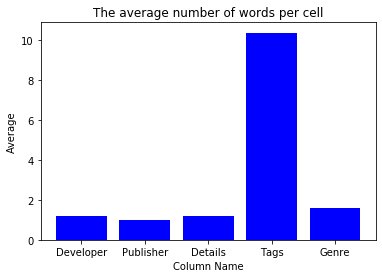

In [91]:
#averages comparison
import matplotlib.pyplot as plt
averages_list = [dev_average, pub_average, gd_average, pop_average, gen_average]
names=["Developer","Publisher","Details","Tags","Genre"]

plt.bar(names, averages_list, color='blue')

plt.xlabel('Column Name')
plt.ylabel('Average')
plt.title('The average number of words per cell')
plt.show()

The bar chart above shows that on average the popular tags column has the largest amount of data in each cell.
This means when making the recommender system the popular tags column is most useful.

# Popular Tags Analysis

In [92]:
#get all tags in a single string
huge_string = ""
#loop through all games popular tags cells
for tags in purged_steam_data['popular_tags']:
    #concaternate
    huge_string = huge_string + tags

print(huge_string)

FPS,Gore,Action,Demons,Shooter,First-Person,Great Soundtrack,Multiplayer,Singleplayer,Fast-Paced,Sci-fi,Horror,Classic,Atmospheric,Difficult,Blood,Remake,Zombies,Co-op,MemesSurvival,Shooter,Multiplayer,Battle Royale,PvP,FPS,Third-Person Shooter,Action,Online Co-Op,Tactical,Co-op,First-Person,Early Access,Strategy,Competitive,Third Person,Team-Based,Difficult,Simulation,StealthMechs,Strategy,Turn-Based,Turn-Based Tactics,Sci-fi,Turn-Based Strategy,Tactical,Singleplayer,Robots,RPG,Action,Multiplayer,Futuristic,Character Customization,Management,Adventure,Space,Story Rich,Great Soundtrack,DifficultSurvival,Zombies,Open World,Multiplayer,PvP,Massively Multiplayer,Action,Early Access,Simulation,FPS,Post-apocalyptic,Survival Horror,Shooter,Sandbox,Adventure,Indie,Co-op,Atmospheric,Horror,MilitarySpace,Massively Multiplayer,Sci-fi,Sandbox,MMORPG,Open World,RPG,PvP,Multiplayer,Free to Play,Economy,Strategy,Space Sim,Simulation,Action,Difficult,Tactical,Capitalism,PvE,AtmosphericAction,Hack and

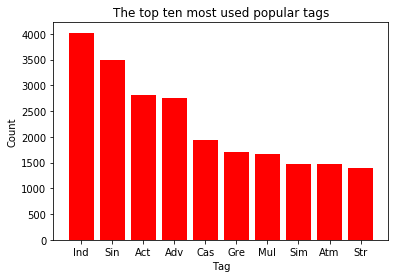

Ind  =  Indie
Sin  =  Singleplayer
Act  =  Action
Adv  =  Adventure
Cas  =  Casual
Gre  =  Great Soundtrack
Mul  =  Multiplayer
Sim  =  Simulation
Atm  =  Atmospheric
Str  =  Strategy


In [93]:

import operator
#create a dictionary for containing the count of each tag
counts = dict()
#create an array of all the tags spliting them at comma`s
words = str.split(huge_string, ',')
#loop through words array
for word in words:
    #if the word is already present in the dictionary add one to the count
    #else create a new word in the dictionary and set the count to one
    if word in counts:
        counts[word] += 1
    else:
        counts[word] = 1

#sort the dictionary from largest item to lowest
counts_dict = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)

#reduce the dictionary down to the top ten
counts_dict = dict(counts_dict[0:10])

#list for containing the top ten popular tags with shortened names
short_tag_names = []

#list for containing the top ten popular tags with the actual full names
#obtain all the keys from the dictionary and create the list
actual_tag_names = list(counts_dict.keys())

#loop through the actual tag names and then take the first three letters and append them to the list
for tag_name in actual_tag_names:
   short_tag_names.append(tag_name[:3])

#plot the bars
plt.bar(short_tag_names, counts_dict.values(), color='red')

#x axis is the tag names
plt.xlabel('Tag')

#y axis is the count of each tag
plt.ylabel('Count')

plt.title('The top ten most used popular tags')

plt.show()

#show the shortened name against the actual names to identify which bar belongs to which tag
for index in range(0, len(actual_tag_names)):
    print(short_tag_names[index], " = ", actual_tag_names[index])

# Hypothesis

A model that supplements similarities with user reviews will have better recommendation scores than a model
with just similarities.

# Data Learning

In [94]:
#obtain all the tags that games can have
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tif_matrix = vectorizer.fit_transform(purged_steam_data['popular_tags'])
for name in vectorizer.get_feature_names():
    print(name)

1980s
1990
2d
360
3d
40k
4x
5d
6dof
abstract
access
action
addictive
adventure
agriculture
aliens
alternate
america
and
animation
anime
apocalyptic
arcade
arena
artificial
arts
assassin
asymmetric
asynchronous
atmospheric
attack
atv
audio
automation
awkward
base
baseball
based
basketball
batman
battle
beat
beautiful
benchmark
bikes
blood
bmx
board
book
bowling
builder
building
bullet
campaign
capitalism
card
cartoon
cartoony
casual
cats
character
chess
choices
choose
cinematic
city
class
classic
click
clicker
co
cold
colorful
combat
comedy
comic
competitive
conspiracy
content
control
controller
controls
conversation
crafting
crawler
crime
croft
crowdfunded
crpg
cult
customization
cute
cyberpunk
cycling
dark
dating
death
defense
demons
design
destruction
detective
development
difficult
dinosaurs
diplomacy
documentary
dog
down
dragons
drama
drawn
driving
dungeon
dungeons
dynamic
dystopian
early
economy
editing
editor
education
em
emotional
endings
epic
episodic
events
experience
experime

# Cosine Similarity Model

In [95]:
#calc the cosine similarity between all game pairs
from sklearn.metrics.pairwise import linear_kernel 
cosine_similarities = linear_kernel(tif_matrix, tif_matrix) 
results = {}
for idx, row in purged_steam_data.iterrows():
   similar_indices = cosine_similarities[idx].argsort()[:-100:-1] #get top 99 most common games
   similar_items = [(cosine_similarities[idx][i], purged_steam_data['url'][i]) for i in similar_indices] 
   results[row['url']] = similar_items[1:]

In [96]:
import itertools
#cosine model function, recommends some games based of a library of games

#cos_recommend: library -> an array of game url's, no_games -> the #of game recommendations
def cos_recommend(library, no_games):
    recs = {} #recommendations
    for url in library:
        for game in results[url]:
            if game[1] in recs:
                recs[game[1]] += game[0]
            else: 
                recs[game[1]] = game[0]
            
    sorted_recs = sorted(recs.items() ,key=lambda x: x[1], reverse=True)
    sorted_recs = sorted_recs[:no_games]
    
    return sorted_recs
                                       
library1 = ['https://store.steampowered.com/app/489830/The_Elder_Scrolls_V_Skyrim_Special_Edition/']

library = ['https://store.steampowered.com/app/489830/The_Elder_Scrolls_V_Skyrim_Special_Edition/',
           'https://store.steampowered.com/app/813820/Realm_Royale/',
           'https://store.steampowered.com/app/55230/Saints_Row_The_Third/']

cos_recommend(library, 10)
results['https://store.steampowered.com/app/489830/The_Elder_Scrolls_V_Skyrim_Special_Edition/']

[(0.7940682804456892,
  'https://store.steampowered.com/app/611670/The_Elder_Scrolls_V_Skyrim_VR/'),
 (0.7347128472318687,
  'https://store.steampowered.com/app/219780/Divinity_II_Developers_Cut/'),
 (0.6889144710684402,
  'https://store.steampowered.com/app/22330/The_Elder_Scrolls_IV_Oblivion_Game_of_the_Year_Edition/'),
 (0.6889144710684402,
  'https://store.steampowered.com/app/900883/The_Elder_Scrolls_IV_Oblivion_Game_of_the_Year_Edition_Deluxe/'),
 (0.6260190568080446,
  'https://store.steampowered.com/app/288470/Fable_Anniversary/'),
 (0.615635607904466,
  'https://store.steampowered.com/app/22320/The_Elder_Scrolls_III_Morrowind_Game_of_the_Year_Edition/'),
 (0.5972939366314769,
  'https://store.steampowered.com/app/367500/Dragons_Dogma_Dark_Arisen/'),
 (0.560577428528251,
  'https://store.steampowered.com/app/204030/Fable__The_Lost_Chapters/'),
 (0.5537780525233916, 'https://store.steampowered.com/app/551770/ECHO/'),
 (0.5363790287889696,
  'https://store.steampowered.com/app/39

# Weighted Cosine Similarity Model

In [97]:
#calc the age in days since game's release
import dateparser
today = datetime.datetime.today()

release = dateparser.parse(purged_steam_data['release_date'][0])
age = []

for i in range(0, len(purged_steam_data)):
    str_release = purged_steam_data['release_date'][i]
    print(str_release)
    if((type(str_release) == str) and 
       (str_release != 'TBA' )):
        if(str_release.split()[0] == 'Summer'):
            year = str_release.split()[1]
            print("Jun 20, " + year)
            release = dateparser.parse("Jun 20, " + year)
            age.append(abs((release - today).days))
        else:
            release = dateparser.parse(purged_steam_data['release_date'][i])     
            age.append(abs((release - today).days))
    else:
        age.append(abs((release - today).days))
 
#'age' no of days since game added to store 
purged_steam_data['age'] = age
#abs((release - today).days)
purged_steam_data

May 12, 2016
Dec 21, 2017
Apr 24, 2018
Dec 13, 2018
May 6, 2003
Mar 7, 2019
Jul 22, 2016
Dec 12, 2017
May 31, 2019
Apr 19, 2018
Sep 25, 2017
May 5, 2015
Jul 27, 2017
Jul 25, 2018
Mar 16, 2017
Feb 7, 2019
Apr 5, 2018
Apr 20, 2017
Nov 9, 2010
Apr 9, 2019
May 21, 2019
Aug 31, 2016
Dec 2, 2008
Oct 10, 2007
Oct 23, 2015
Mar 27, 2018
Mar 23, 2018
Mar 28, 2016
Aug 8, 2017
Apr 18, 2016
Aug 1, 2018
Aug 21, 2017
Nov 1, 2005
Sep 2, 2008
Sep 26, 2018
Feb 7, 2012
Feb 28, 2011
Jun 13, 2019
Nov 1, 2004
Oct 13, 2014
Jan 11, 2019
Feb 16, 2006
Sep 14, 2017
Feb 15, 2016
Oct 13, 2015
Jun 5, 2019
Jan 24, 2019
Apr 2, 2015
Sep 16, 2008
Oct 9, 2017
Apr 19, 2017
Jun 6, 2012
Jun 5, 2019
Oct 27, 2010
Mar 26, 2015
Aug 15, 2018
May 31, 2017
Mar 7, 2018
Jun 5, 2018
Dec 12, 2017
Nov 15, 2006
Jan 10, 2019
May 12, 2016
Oct 18, 2018
Sep 26, 2012
Nov 2, 2017
Oct 30, 2017
Oct 8, 2015
Dec 19, 2008
Jun 11, 2019
Aug 11, 2015
Nov 30, 2015
Mar 25, 2013
May 15, 2014
Jun 25, 2012
Feb 14, 2019
May 30, 2019
Sep 19, 2018
Jun 20, 2

Dec 14, 2016
Mar 11, 2016
Oct 28, 2008
Nov 15, 2018
Sep 11, 2006
Oct 17, 2013
May 29, 2019
Oct 16, 2008
Aug 18, 2014
Dec 11, 2018
Nov 30, 2017
May 18, 2017
Jun 5, 2018
Sep 18, 2014
Jun 12, 2012
May 31, 2019
Oct 23, 2018
Jun 16, 2017
Aug 29, 2018
Mar 4, 2016
Jan 19, 2015
Nov 26, 2014
Aug 9, 2016
Jan 29, 2015
Nov 20, 2014
Jul 20, 2017
Dec 7, 2017
Mar 29, 2017
Feb 23, 2018
Aug 1, 2017
Dec 1, 2017
Nov 17, 2008
Apr 18, 2018
Feb 27, 2018
Feb 27, 2012
Feb 18, 2016
Feb 9, 2016
May 28, 2019
Jun 23, 2015
Dec 10, 2015
May 23, 2019
Jan 1, 2006
Aug 9, 2018
Jun 6, 2019
Dec 15, 2015
Jun 13, 2019
Feb 25, 2016
Apr 30, 2019
Jun 6, 2005
Jun 21, 2016
Mar 4, 2009
Dec 4, 2018
Oct 13, 2009
Aug 17, 2018
Oct 15, 2012
Feb 21, 2018
Sep 15, 2015
Feb 18, 2016
Feb 6, 2018
Aug 6, 2018
Oct 11, 2018
Jun 20, 2017
nan
nan
Mar 6, 2017
Aug 2, 2016
Mar 2020
Nov 23, 2018
Mar 3, 2017
Oct 10, 2016
Aug 26, 2016
Mar 21, 2018
Mar 5, 2008
May 30, 2019
Sep 3, 2019
Apr 28, 2015
Oct 2, 2018
Aug 2, 2016
Oct 30, 2018
Jul 10, 2011
May 

May 8, 2001
Jun 21, 2017
Jul 28, 2014
Sep 30, 1997
Aug 2, 2017
Oct 3, 2018
Dec 20, 2018
Dec 6, 2017
May 25, 2018
Dec 17, 2015
Dec 6, 2018
Apr 17, 2019
Aug 20, 2013
Sep 28, 2016
Nov 14, 2018
Jul 29, 2014
Mar 24, 2017
Aug 10, 2018
Oct 25, 2017
May 9, 2017
Oct 27, 2014
Nov 13, 2009
Sep 27, 2016
May 26, 2014
Mar 7, 2019
Dec 4, 2018
Feb 7, 2014
Nov 11, 2003
Oct 29, 2012
Feb 15, 2016
Jun 30, 2015
Apr 20, 2017
Oct 17, 2014
May 14, 2013
Mar 8, 2018
Oct 9, 2018
Oct 16, 2017
Oct 10, 2012
Sep 1, 2006
Mar 6, 2017
Sep 1, 2011
Oct 17, 2018
Jun 20, 2016
May 28, 2019
Jul 18, 2017
Jun 4, 2019
Jul 24, 2012
Sep 24, 2015
Dec 14, 2018
Sep 12, 2016
Nov 7, 2017
Apr 4, 2016
Mar 22, 2011
Jun 6, 2013
Feb 3, 2011
Dec 19, 2008
Jun 3, 2016
Sep 28, 2017
Apr 5, 2016
Oct 27, 2014
Nov 29, 2018
Sep 1, 2017
Jun 23, 2009
Aug 23, 2018
Jul 26, 2017
Oct 1, 2009
Sep 7, 2012
Mar 19, 2019
Oct 4, 2016
Jan 18, 2016
Sep 26, 2018
Sep 5, 2016
Apr 11, 2018
Aug 28, 2018
Dec 22, 2018
Feb 13, 2015
Oct 4, 2017
Aug 14, 2018
Sep 8, 2017
O

Apr 23, 2019
Dec 5, 2016
Nov 3, 2016
Sep 15, 2009
Apr 22, 2016
May 1, 2019
Apr 4, 2018
Jan 24, 2013
May 5, 2016
Jul 12, 2005
Dec 19, 2016
May 29, 2019
Mar 7, 2018
Jan 22, 2018
Sep 28, 2015
Oct 31, 1996
Aug 22, 2017
Dec 10, 2015
May 1, 2019
Jun 5, 2007
Nov 20, 2015
Mar 29, 1996
Jul 13, 2018
Jan 8, 2016
Nov 24, 2009
Mar 21, 2014
Dec 12, 2006
Jul 3, 2015
Nov 6, 2015
Feb 7, 2017
Jun 6, 2019
Sep 21, 2017
Jan 25, 2019
Oct 11, 2011
Oct 11, 2018
Oct 14, 2016
Oct 29, 1997
Apr 5, 2016
Jul 10, 2015
Jun 21, 2016
Aug 6, 2014
Jun 21, 2018
Feb 25, 2014
May 29, 2015
May 20, 2015
Nov 16, 2011
Mar 28, 2017
Jan 7, 2019
May 21, 2019
Feb 28, 1998
Aug 7, 2017
Nov 22, 2016
Dec 15, 2011
Jan 21, 2019
Aug 28, 2015
Oct 21, 2013
Sep 19, 2018
Aug 30, 2016
May 30, 2019
Mar 15, 2018
Jun 30, 2017
Apr 2, 2015
Jun 1, 2015
Sep 13, 2018
May 8, 2018
Dec 8, 2018
Apr 4, 2019
Jul 6, 2017
Mar 30, 2017
Jul 1, 2013
Oct 17, 1997
Mar 26, 2019
Sep 23, 2010
Nov 3, 2011
Apr 13, 2016
Mar 8, 2018
Dec 12, 2014
Mar 1, 2017
Jul 25, 2017


Aug 21, 2018
May 8, 2015
Feb 6, 2017
Oct 2, 2017
Oct 24, 2013
Jun 10, 2013
Jan 23, 2019
Oct 7, 2014
Jan 7, 2019
Dec 1, 2015
May 8, 2014
Apr 5, 2016
Mar 28, 2017
Mar 6, 1998
Nov 2, 2010
Nov 9, 2018
Jan 31, 2019
Jan 11, 2018
Oct 17, 2006
Sep 21, 2018
Feb 3, 2015
Jun 17, 2016
May 8, 2014
Jul 25, 2017
Mar 24, 2016
Nov 16, 2016
Jun 3, 2014
Sep 26, 2017
Oct 11, 2005
Nov 30, 2016
Jul 16, 2015
Apr 6, 2005
Apr 14, 2019
Mar 30, 2018
Sep 21, 2016
Nov 15, 2013
Nov 16, 2016
Jun 15, 2011
Jun 1, 2018
Mar 28, 2005
Jun 11, 2018
Jul 14, 2015
Mar 25, 2018
Nov 30, 2017
Oct 14, 2003
Oct 5, 2017
Apr 15, 2019
Mar 4, 2016
Sep 8, 2009
Feb 21, 2018
Apr 11, 2018
Feb 19, 2014
May 20, 2016
Sep 26, 2017
Jun 9, 2016
Jul 25, 2016
May 31, 2019
Sep 4, 2015
Dec 20, 2016
Nov 9, 2017
Jan 25, 2019
Aug 4, 2016
Oct 25, 2018
Apr 3, 2019
Feb 28, 2018
Oct 15, 2018
Apr 18, 2019
Mar 28, 2016
Nov 15, 2016
Feb 19, 2016
May 10, 2017
Nov 16, 2016
May 3, 2017
Oct 21, 2015
Nov 7, 2014
Jun 13, 2019
Jul 6, 2015
Sep 5, 2016
Apr 16, 2019
J

Apr 24, 2014
Dec 4, 2018
Aug 29, 2018
Aug 20, 2015
Apr 15, 2016
Aug 24, 2015
May 31, 2019
Oct 31, 2017
May 10, 2019
Mar 7, 2017
Mar 8, 2018
Dec 14, 2016
Oct 22, 2015
Oct 19, 2010
Dec 19, 2017
Jun 13, 2017
Dec 14, 2017
Jan 12, 2017
Feb 5, 2019
Nov 14, 2018
Dec 5, 2016
Sep 25, 2013
Feb 9, 2017
Feb 21, 2019
Aug 15, 2018
Sep 15, 2016
Apr 1, 2016
Apr 11, 2017
Dec 16, 2017
Sep 13, 2017
Mar 14, 2016
Oct 26, 2018
Sep 7, 2011
May 20, 2015
Nov 20, 2017
May 18, 2018
Aug 14, 2017
Sep 20, 2017
Sep 18, 2018
Jul 19, 2018
Mar 30, 2018
Mar 24, 2019
Mar 7, 2007
Sep 10, 2018
Nov 21, 2017
Aug 23, 2010
May 22, 2018
Aug 28, 2015
Sep 5, 2016
May 8, 2018
May 23, 2019
Jan 16, 2018
Oct 31, 2011
Feb 28, 2005
Sep 12, 2006
May 17, 2019
May 20, 2019
Jul 13, 2017
Jun 18, 2004
Oct 15, 2017
Mar 6, 2018
Feb 8, 2017
Jul 19, 2017
May 18, 2018
Oct 29, 2012
Jun 3, 2016
Apr 26, 2017
Nov 1, 2018
Feb 4, 2015
Aug 12, 2009
Jan 16, 2019
Jul 10, 2018
Oct 28, 2016
Sep 27, 2012
Apr 6, 2018
Oct 14, 2016
Sep 22, 2010
Oct 5, 2017
Feb 

Jan 23, 2017
Jan 21, 2019
Oct 14, 2016
Mar 28, 2019
Apr 25, 2019
Aug 13, 2015
Apr 4, 2019
Dec 22, 2016
Aug 16, 2016
Mar 5, 2015
Aug 1, 2018
Apr 18, 2019
May 3, 2018
Jun 4, 2014
Apr 19, 2019
Feb 2, 2016
Nov 10, 2017
Aug 18, 2013
Aug 11, 2017
Oct 20, 2017
Jun 7, 2019
Oct 21, 2015
Apr 2015
Nov 4, 2016
Jul 1, 2014
Jul 13, 2017
Jun 12, 2019
Sep 25, 2017
Nov 30, 1998
Dec 13, 2016
Jul 24, 2018
Aug 17, 2017
Oct 16, 2015
Oct 4, 2016
Feb 20, 2017
Sep 30, 2015
Jun 13, 2017
Apr 11, 2019
Nov 9, 2015
Mar 25, 2016
Jul 9, 2013
Aug 31, 2017
May 18, 2017
Dec 2, 2016
May 29, 2019
May 1, 2005
Apr 19, 2019
Nov 24, 2017
Jul 23, 2001
Oct 31, 2017
Apr 28, 2014
Jul 5, 2016
Dec 11, 2013
Dec 11, 2015
Jan 1, 1995
Jan 1, 2016
Oct 25, 2017
Nov 29, 2017
Jan 27, 2017
Oct 16, 2017
Jun 5, 2019
Apr 30, 2019
Aug 2, 2017
Apr 27, 2016
Oct 19, 2018
Apr 7, 2016
Jun 28, 2015
Apr 16, 2019
nan
Oct 14, 2014
Jul 28, 2017
Feb 14, 2019
Jun 12, 2019
Dec 21, 2012
Mar 21, 2016
Jun 7, 2017
May 21, 2018
May 16, 2019
Sep 24, 2015
Sep 26,

Dec 25, 2023
Sep 9, 2016
Jun 21, 2018
Dec 27, 2014
May 20, 2019
May 31, 2017
Jul 8, 2016
Sep 1, 2003
Jun 8, 2019
Jul 16, 2018
Apr 6, 2019
Feb 1, 2019
Aug 31, 2018
Sep 14, 2016
Feb 6, 2019
Nov 27, 2013
Oct 25, 2018
Apr 30, 2015
Jan 15, 2019
May 17, 2016
Aug 31, 2016
Sep 9, 2003
May 7, 2019
Apr 19, 2019
Nov 30, 2016
Mar 11, 2014
Mar 27, 2019
Sep 18, 2018
Mar 24, 2016
Oct 2010
Apr 19, 2019
Mar 7, 2019
Jun 30, 2017
May 9, 2019
Apr 1, 2018
Jan 13, 2017
Jul 18, 2018
Jun 18, 2018
Feb 28, 2018
Aug 9, 2016
Sep 11, 2017
Sep 17, 2014
Sep 22, 2016
Aug 21, 2017
Apr 27, 2018
Dec 19, 2016
Apr 25, 2016
May 13, 2013
Jan 31, 1998
Sep 3, 2018
Feb 20, 2018
Jun 20, 2018
Aug 3, 2017
Jul 13, 2018
Dec 14, 2017
Jun 4, 2018
Nov 2, 2017
Sep 18, 2018
May 29, 2018
Sep 4, 2018
Jan 7, 2019
Nov 7, 2018
Jul 18, 2016
Dec 15, 2017
Nov 28, 2008
Feb 14, 2019
Dec 28, 2018
Jun 13, 2016
Feb 28, 2019
Dec 23, 2016
Jul 16, 2015
Aug 9, 2017
Jun 8, 2019
Nov 26, 2018
Nov 21, 2008
Mar 29, 2016
Dec 4, 2018
Jan 22, 2019
Oct 12, 2018


Nov 2, 2017
Feb 14, 2019
Feb 28, 2014
Aug 22, 2017
May 16, 2016
Oct 17, 2018
Nov 2, 2016
Feb 20, 2019
Jan 15, 2015
Nov 1, 2008
Mar 22, 1999
Dec 21, 2015
Aug 16, 2016
Jan 1, 1994
Oct 1, 2006
Aug 31, 1996
Aug 17, 2015
Jun 29, 2010
Jul 21, 2009
Dec 29, 2016
Jul 25, 2016
Mar 14, 2017
Oct 5, 2018
Mar 22, 2019
Apr 3, 2018
Nov 18, 2014
Sep 27, 2018
May 12, 2009
May 22, 2018
Oct 4, 2017
Aug 9, 2017
Jun 7, 2018
Nov 18, 2016
May 31, 2018
Jun 1, 2018
Apr 25, 2019
Sep 10, 2015
Jan 17, 2017
Sep 29, 2017
Nov 9, 2017
Mar 19, 2014
Mar 25, 2006
Jul 19, 2018
Mar 26, 2002
Dec 31, 2003
May 17, 2018
Mar 27, 2011
May 24, 2019
Sep 19, 2016
Jul 31, 2012
Jul 5, 2018
May 1, 2003
Mar 15, 1999
nan
Jun 12, 2019
Mar 7, 2019
Apr 12, 2019
Dec 20, 2018
Feb 1, 2019
Dec 13, 2016
Mar 9, 2017
May 30, 2016
Nov 12, 2015
Jun 18, 2015
Nov 16, 2016
Sep 8, 2015
Nov 19, 2014
Aug 26, 2011
Nov 29, 2004
Jan 30, 2015
May 6, 2015
May 13, 2016
Sep 23, 2015
May 3, 2019
Sep 30, 1995
Feb 20, 2004
Mar 10, 2007
Mar 9, 2015
Aug 2, 2018
Jun 

Jan 22, 2016
Aug 14, 2014
Jul 8, 2016
Dec 28, 2017
Aug 17, 2017
Apr 2, 2018
Mar 1, 2018
Jan 11, 2018
Jan 30, 2019
Oct 11, 2018
Mar 23, 2018
Oct 27, 2017
Oct 2, 2017
Dec 12, 2018
Sep 12, 2018
Oct 13, 2017
Dec 3, 2018
Apr 30, 2018
Mar 9, 2018
Feb 18, 2019
Feb 1, 2018
Oct 17, 2018
Oct 1, 2018
Nov 10, 2017
Sep 19, 2018
Sep 26, 2017
Mar 19, 2018
Oct 26, 2017
Sep 1, 2017
Mar 23, 2018
Feb 12, 2019
Feb 12, 2018
Feb 5, 2018
Feb 1, 2018
Jul 30, 2017
May 17, 2018
Jun 17, 2018
Feb 12, 2018
Nov 30, 2017
Oct 31, 2017
May 21, 2018
Jul 8, 2018
Oct 17, 2017
Nov 5, 2018
Oct 9, 2017
Mar 8, 2018
Jun 15, 2018
Jul 26, 2018
Dec 20, 2019
Apr 12, 2018
Nov 8, 2017
Dec 26, 2018
Oct 31, 2017
Sep 18, 2018
Mar 26, 2018
Jul 7, 2018
Jun 22, 2009
Dec 14, 2006
Jul 24, 2006
Jun 22, 2010
May 5, 2016
Oct 23, 2012
Jun 15, 2011
Feb 27, 2015
Apr 17, 2015
Jul 14, 2015
May 29, 2015
Aug 21, 2018
Oct 5, 2015
Jul 3, 2015
Sep 3, 2015
Aug 28, 2015
Apr 28, 2015
May 5, 2015
Aug 21, 2015
Mar 2, 2018
May 21, 2015
Jan 28, 2016
May 26, 2

May 13, 2016
Apr 21, 2016
Feb 21, 2017
Feb 21, 2017
Dec 7, 2016
Oct 4, 2016
Mar 12, 2016
Aug 17, 2016
May 26, 2016
May 19, 2016
May 16, 2016
Jan 11, 2019
Mar 25, 2016
Jan 31, 2015
Feb 15, 2016
Mar 24, 2016
Mar 15, 2016
Nov 2, 2015
Jul 21, 2005
May 13, 2014
Nov 9, 2016
Nov 22, 2016
Dec 5, 2016
Dec 5, 2016
Feb 3, 2017
Jan 30, 2018
Jan 18, 2019
May 25, 2017
Dec 2, 2016
Nov 26, 2013
Dec 21, 2016
Mar 3, 2017
Feb 24, 2017
Dec 15, 2016
Jan 5, 2017
Mar 23, 2017
Dec 13, 2016
Jul 20, 2018
Feb 15, 2019
Aug 29, 2018
Sep 14, 2018
May 31, 2018
May 8, 2018
May 14, 2018
Apr 23, 2018
Jul 30, 2018
Sep 27, 1996
Feb 21, 2017
Feb 13, 2017
Mar 25, 2016
Aug 18, 2016
Jun 14, 2016
Feb 29, 2016
Mar 5, 2016
Oct 3, 2016
Feb 14, 2017
Dec 1, 2016
Feb 19, 2016
Mar 8, 2017
Nov 27, 2018
Nov 5, 2018
Oct 4, 2018
May 23, 2018
Dec 29, 2016
Mar 9, 2015
Apr 19, 2017
Mar 1, 2017
Jun 19, 2017
Dec 20, 2016
Aug 16, 2018
Apr 19, 2018
Jan 25, 2017
Oct 29, 2015
Apr 16, 2015
Apr 16, 2014
Jun 25, 2015
Sep 29, 2014
Aug 25, 2014
Oct 3

Oct 22, 2012
Jul 19, 2010
Sep 13, 2013
Feb 20, 2014
Nov 19, 2012
Oct 14, 2014
Sep 25, 2012
Nov 5, 2013
Apr 23, 2013
Jun 25, 2013
Dec 16, 2015
Sep 11, 2012
Mar 26, 2013
Mar 25, 2014
Oct 17, 2013
Nov 12, 2013
Aug 15, 2018
Apr 19, 2016
May 18, 2016
Sep 29, 2016
Oct 1, 2010
Jan 25, 2016
Apr 22, 2016
May 29, 2018
Feb 23, 2016
May 24, 2017
Jan 27, 2016
Dec 8, 2015
Nov 30, 2015
Mar 4, 2016
Dec 9, 2015
Aug 9, 2017
Dec 1, 2015
Apr 18, 2016
Oct 26, 2015
Jun 1, 2018
Feb 23, 2017
Mar 13, 2019
May 12, 2017
Mar 28, 2014
Nov 6, 2015
Nov 5, 2013
May 9, 2014
Dec 10, 2013
Aug 7, 2013
Mar 10, 2014
Sep 12, 2013
Apr 1, 2014
Dec 16, 2011
Jan 16, 2014
Dec 16, 2016
Jan 22, 2016
May 26, 2016
Feb 16, 2016
Sep 21, 2015
May 11, 2015
Sep 24, 2015
Dec 1, 2017
Jan 19, 2016
Jun 25, 2015
Jun 2, 2016
Mar 17, 2017
Apr 27, 2015
Sep 26, 2013
Apr 11, 2011
May 25, 2015
Feb 22, 2017
Mar 13, 2018
Apr 7, 2015
Jan 15, 2015
Apr 28, 2015
Jun 5, 2015
Nov 5, 2015
Oct 31, 2017
Jul 28, 2015
Sep 2, 2016
Mar 10, 2015
Dec 1, 2016
Jul 1,

,url,name,release_date,developer,publisher,popular_tags,game_details,languages,genre,mature_content,original_price,discount_price,amt_rec_revs,rec_rev_score,amt_all_revs,all_rev_score,age
0,https://store.steampowered.com/app/379720/DOOM/,DOOM,"May 12, 2016",id Software,Bethesda Softworks,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,,19.99,14.99,554,89,42550,92,1412
1,https://store.steampowered.com/app/578080/PLAY...,PLAYERUNKNOWN'S BATTLEGROUNDS,"Dec 21, 2017",PUBG Corporation,PUBG Corporation,"Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",Mature Content Description The developers de...,29.99,-1.00,6214,49,836608,49,824
2,https://store.steampowered.com/app/637090/BATT...,BATTLETECH,"Apr 24, 2018",Harebrained Schemes,Paradox Interactive,"Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",,39.99,-1.00,166,54,7030,71,700
3,https://store.steampowered.com/app/221100/DayZ/,DayZ,"Dec 13, 2018",Bohemia Interactive,Bohemia Interactive,"Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",,44.99,-1.00,932,57,167115,61,467
4,https://store.steampowered.com/app/8500/EVE_On...,EVE Online,"May 6, 2003",CCP,CCP,"Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",,0.00,-1.00,287,54,11481,74,6167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,https://store.steampowered.com/app/391040/F1_2...,F1 2016,"Aug 18, 2016","Codemasters,Feral Interactive (Mac)",Codemasters,"Racing,Simulation,Sports,Multiplayer,Singlepla...","Single-player,Multi-player,Steam Achievements,...","English,French,Italian,German,Spanish - Spain,...","Racing,Simulation,Sports",,59.99,707.84,0,0,2458,82,1314
7996,https://store.steampowered.com/app/208500/F1_2...,F1 2012™,"Sep 17, 2012",Codemasters Birmingham,Codemasters,"Racing,Simulation,Sports,Realistic,Multiplayer...","Single-player,Multi-player,Co-op,Steam Achieve...","English,German,French,Italian,Spanish - Spain,...","Racing,Simulation,Sports",,19.99,707.84,18,83,910,87,2745
7997,https://store.steampowered.com/app/40930/The_M...,The Misadventures of P.B. Winterbottom,"Apr 20, 2010",The Odd Gentlemen,2K,"Indie,Puzzle,Platformer,Adventure,Time Manipul...","Single-player,Steam Achievements,Partial Contr...","English,French,German,Italian,Spanish - Spain","Adventure,Indie",,4.99,-1.00,0,0,307,88,3626
7998,https://store.steampowered.com/app/360650/12_L...,12 Labours of Hercules III: Girl Power,"Aug 7, 2015","Jetdogs Studios,Zoom Out Games",Jetdogs Studios,"Casual,Strategy,Time Management,Singleplayer,M...","Single-player,Steam Achievements,Steam Trading...","English,French,German,Russian,Italian,Spanish ...","Casual,Strategy",,2.99,16.73,0,0,674,87,1691


In [98]:
#calc the weigths of all and thirty day reviews
import numpy as np

w30 = np.zeros(8000)
wAll = np.ones(8000)
for i in range(0, len(purged_steam_data)):
    age = purged_steam_data['age'][i]
    if (30 < age):
        w30[i] = ((age - 30)/30)
        
total = w30 + 1
w30 = w30/total
wAll = wAll/total

purged_steam_data['w30'] = w30
purged_steam_data['wAll'] = wAll

#keys for new columns:
#'w30' -> weight of the 30 days recommendations 
#'wAll' -> weight of all recommendations 

In [99]:
#add the weights to the dataset
psd = purged_steam_data
purged_steam_data['weighted_revs'] = (psd['w30'] * (psd['rec_rev_score']/100)) + (psd['wAll'] * (psd['all_rev_score']/100)) 

purged_steam_data

,url,name,release_date,developer,publisher,popular_tags,game_details,languages,genre,mature_content,original_price,discount_price,amt_rec_revs,rec_rev_score,amt_all_revs,all_rev_score,age,w30,wAll,weighted_revs
0,https://store.steampowered.com/app/379720/DOOM/,DOOM,"May 12, 2016",id Software,Bethesda Softworks,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,,19.99,14.99,554,89,42550,92,1412,0.978754,0.021246,0.890637
1,https://store.steampowered.com/app/578080/PLAY...,PLAYERUNKNOWN'S BATTLEGROUNDS,"Dec 21, 2017",PUBG Corporation,PUBG Corporation,"Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",Mature Content Description The developers de...,29.99,-1.00,6214,49,836608,49,824,0.963592,0.036408,0.490000
2,https://store.steampowered.com/app/637090/BATT...,BATTLETECH,"Apr 24, 2018",Harebrained Schemes,Paradox Interactive,"Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",,39.99,-1.00,166,54,7030,71,700,0.957143,0.042857,0.547286
3,https://store.steampowered.com/app/221100/DayZ/,DayZ,"Dec 13, 2018",Bohemia Interactive,Bohemia Interactive,"Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",,44.99,-1.00,932,57,167115,61,467,0.935760,0.064240,0.572570
4,https://store.steampowered.com/app/8500/EVE_On...,EVE Online,"May 6, 2003",CCP,CCP,"Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",,0.00,-1.00,287,54,11481,74,6167,0.995135,0.004865,0.540973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,https://store.steampowered.com/app/391040/F1_2...,F1 2016,"Aug 18, 2016","Codemasters,Feral Interactive (Mac)",Codemasters,"Racing,Simulation,Sports,Multiplayer,Singlepla...","Single-player,Multi-player,Steam Achievements,...","English,French,Italian,German,Spanish - Spain,...","Racing,Simulation,Sports",,59.99,707.84,0,0,2458,82,1314,0.977169,0.022831,0.018721
7996,https://store.steampowered.com/app/208500/F1_2...,F1 2012™,"Sep 17, 2012",Codemasters Birmingham,Codemasters,"Racing,Simulation,Sports,Realistic,Multiplayer...","Single-player,Multi-player,Co-op,Steam Achieve...","English,German,French,Italian,Spanish - Spain,...","Racing,Simulation,Sports",,19.99,707.84,18,83,910,87,2745,0.989071,0.010929,0.830437
7997,https://store.steampowered.com/app/40930/The_M...,The Misadventures of P.B. Winterbottom,"Apr 20, 2010",The Odd Gentlemen,2K,"Indie,Puzzle,Platformer,Adventure,Time Manipul...","Single-player,Steam Achievements,Partial Contr...","English,French,German,Italian,Spanish - Spain","Adventure,Indie",,4.99,-1.00,0,0,307,88,3626,0.991726,0.008274,0.007281
7998,https://store.steampowered.com/app/360650/12_L...,12 Labours of Hercules III: Girl Power,"Aug 7, 2015","Jetdogs Studios,Zoom Out Games",Jetdogs Studios,"Casual,Strategy,Time Management,Singleplayer,M...","Single-player,Steam Achievements,Steam Trading...","English,French,German,Russian,Italian,Spanish ...","Casual,Strategy",,2.99,16.73,0,0,674,87,1691,0.982259,0.017741,0.015435


In [100]:
#end producted is a set of recommendations with weighted reviews added to the similarity
psd = purged_steam_data

weighted_results = {}

similarities = cosine_similarities
for idx, row in purged_steam_data.iterrows():
   similar_indices = cosine_similarities[idx].argsort()[:-100:-1] #get top 99 most common games
   for i in similar_indices:
        similarities[idx][i] = cosine_similarities[idx][i] * purged_steam_data['weighted_revs'][i]
        
   similar_indices = similarities[idx].argsort()[:-100:-1]
   similar_items = [(similarities[idx][i], purged_steam_data['url'][i]) for i in similar_indices] 
   weighted_results[row['url']] = similar_items[1:]
   



weighted_results['https://store.steampowered.com/app/379720/DOOM/']


[(0.6456722629794045,
  'https://store.steampowered.com/app/214870/Painkiller_Hell__Damnation/'),
 (0.5741742979490445, 'https://store.steampowered.com/app/519860/DUSK/'),
 (0.5379219512069704,
  'https://store.steampowered.com/app/13230/Unreal_Tournament_2004_Editors_Choice_Edition/'),
 (0.5356362023479587, 'https://store.steampowered.com/app/2290/Final_DOOM/'),
 (0.5296999740930339, 'https://store.steampowered.com/app/2320/QUAKE_II/'),
 (0.5151630413717916,
  'https://store.steampowered.com/app/2280/Ultimate_Doom/'),
 (0.5072015508901486,
  'https://store.steampowered.com/app/208200/Doom_3_BFG_Edition/'),
 (0.4842531601526728,
  'https://store.steampowered.com/app/422970/Devil_Daggers/'),
 (0.4829747168863835,
  'https://store.steampowered.com/app/41000/Serious_Sam_HD_The_First_Encounter/'),
 (0.4824939437040987,
  'https://store.steampowered.com/app/13210/Unreal_Tournament_3_Black/'),
 (0.47602798256721435, 'https://store.steampowered.com/app/2300/DOOM_II/'),
 (0.47567910403134933,


In [101]:
results['https://store.steampowered.com/app/379720/DOOM/']

[(0.6883494171425641,
  'https://store.steampowered.com/app/214870/Painkiller_Hell__Damnation/'),
 (0.6697525813685312,
  'https://store.steampowered.com/app/782330/DOOM_Eternal/'),
 (0.6369681854912039,
  'https://store.steampowered.com/app/39530/Painkiller_Black_Edition/'),
 (0.6326916868878018,
  'https://store.steampowered.com/app/9070/DOOM_3_Resurrection_of_Evil/'),
 (0.6301346188358591, 'https://store.steampowered.com/app/2290/Final_DOOM/'),
 (0.5803456546652125, 'https://store.steampowered.com/app/731720/DOOMED/'),
 (0.5790904668500243, 'https://store.steampowered.com/app/9050/DOOM_3/'),
 (0.5752758900789829, 'https://store.steampowered.com/app/519860/DUSK/'),
 (0.5723276421746241, 'https://store.steampowered.com/app/2210/Quake_IV/'),
 (0.5709838169260986, 'https://store.steampowered.com/app/13520/Far_Cry/'),
 (0.565396011086472,
  'https://store.steampowered.com/app/378270/Putrefaction/'),
 (0.5641109393624519,
  'https://store.steampowered.com/app/208200/Doom_3_BFG_Edition/'),

In [102]:
weighted_results['https://store.steampowered.com/app/730/CounterStrike_Global_Offensive/']


[(0.7146940994446243, 'https://store.steampowered.com/app/222880/Insurgency/'),
 (0.6630789025173431,
  'https://store.steampowered.com/app/240/CounterStrike_Source/'),
 (0.6007707028077894,
  'https://store.steampowered.com/app/10180/Call_of_Duty_Modern_Warfare_2/'),
 (0.5423432168350024,
  'https://store.steampowered.com/app/440/Team_Fortress_2/'),
 (0.5416279773600193, 'https://store.steampowered.com/app/107410/Arma_3/'),
 (0.5407917290166072, 'https://store.steampowered.com/app/500/Left_4_Dead/'),
 (0.5330209702310603,
  'https://store.steampowered.com/app/33930/Arma_2_Operation_Arrowhead/'),
 (0.5121982666666286, 'https://store.steampowered.com/app/242860/Verdun/'),
 (0.5119832761003315,
  'https://store.steampowered.com/app/35450/Red_Orchestra_2_Heroes_of_Stalingrad_with_Rising_Storm/'),
 (0.5111385667927592,
  'https://store.steampowered.com/app/24240/PAYDAY_The_Heist/'),
 (0.5104747160053298,
  'https://store.steampowered.com/app/359550/Tom_Clancys_Rainbow_Six_Siege/'),
 (0.509

In [103]:
#interface function for testings, gets top no_games for a given library of games
def weighted_cos_recommend(library, no_games):
    recs = {} #recommendations
    for url in library:
        for game in weighted_results[url]:
            if game[1] in recs:
                recs[game[1]] += game[0]
            else: 
                recs[game[1]] = game[0]
            
    sorted_recs = sorted(recs.items() ,key=lambda x: x[1], reverse=True)
    sorted_recs = sorted_recs[:no_games]

    return sorted_recs

library1 = ['https://store.steampowered.com/app/489830/The_Elder_Scrolls_V_Skyrim_Special_Edition/']

library = ['https://store.steampowered.com/app/489830/The_Elder_Scrolls_V_Skyrim_Special_Edition/',
           'https://store.steampowered.com/app/813820/Realm_Royale/',
           'https://store.steampowered.com/app/55230/Saints_Row_The_Third/']

weighted_cos_recommend(library, 10)
weighted_results['https://store.steampowered.com/app/489830/The_Elder_Scrolls_V_Skyrim_Special_Edition/']

[(0.6407356032097089,
  'https://store.steampowered.com/app/22330/The_Elder_Scrolls_IV_Oblivion_Game_of_the_Year_Edition/'),
 (0.6358046640563312,
  'https://store.steampowered.com/app/900883/The_Elder_Scrolls_IV_Oblivion_Game_of_the_Year_Edition_Deluxe/'),
 (0.5659735248370956,
  'https://store.steampowered.com/app/219780/Divinity_II_Developers_Cut/'),
 (0.5603131366457501,
  'https://store.steampowered.com/app/22320/The_Elder_Scrolls_III_Morrowind_Game_of_the_Year_Edition/'),
 (0.5074829320147295, 'https://store.steampowered.com/app/551770/ECHO/'),
 (0.5058720862517995,
  'https://store.steampowered.com/app/611670/The_Elder_Scrolls_V_Skyrim_VR/'),
 (0.4882018911830261,
  'https://store.steampowered.com/app/288470/Fable_Anniversary/'),
 (0.48451078742047454,
  'https://store.steampowered.com/app/367500/Dragons_Dogma_Dark_Arisen/'),
 (0.4579340912092218, 'https://store.steampowered.com/app/40300/Risen/'),
 (0.4503485800652041,
  'https://store.steampowered.com/app/102500/Kingdoms_of_Am

# Evaluation

In [104]:
#evaluation
#create a list of libraries with 20 unique game urls
import random
random.seed(0)

libraries = []
for i in range(0, 100):
    libraries.append([])
    for j in range(0, 20):
        url = psd["url"][random.randint(0, 8000)]
        if 0 < libraries[i].count(url):
            --j
        else:
            libraries[i].append(url)

In [105]:
#peform recomendations
from sklearn.preprocessing import MinMaxScaler

cos_recs = []
weighted_cos_recs = []
for library in libraries:
    cos_recs.append(cos_recommend(library, 10))
    weighted_cos_recs.append(weighted_cos_recommend(library, 10))
    
for i in range(0, len(cos_recs)):
    cos_recs[i] = pd.DataFrame(np.array(cos_recs[i]), columns=['a', 'b'])['b']

for i in range(0, len(weighted_cos_recs)):
    weighted_cos_recs[i] = pd.DataFrame(np.array(weighted_cos_recs[i]), columns=['a', 'b'])['b']
#normalise recommendations
scaler = MinMaxScaler()
cos_recs = scaler.fit_transform(cos_recs)
weighted_cos_recs = scaler.fit_transform(weighted_cos_recs)


In [106]:
#customer opinion, 1 = would buy, 0 = wouldn't  buy
opinions = []
for i in range(0, 100):
    opinions.append([])
    for j in range(0, 10):
        opinions[i].append(random.randint(0,1))


In [107]:
from sklearn.metrics import mean_squared_error
from math import sqrt
    
#find RMSE
cos_RMSE = sqrt(mean_squared_error(opinions, cos_recs))
weighted_cos_RMSE =  sqrt(mean_squared_error(opinions, weighted_cos_recs))

#cos_RMSE 0.5850476088649076
#weighted_cos_RMSE 0.5865904706379691

In [108]:
#finding mean average precsion MAP
import ml_metrics 
#round recommendations to 1 or 0
cos_recs_rnd = np.empty(shape=(100, 10))
for i in range(0, len(cos_recs)):
    cos_recs_rnd[i] = list(map(round, cos_recs[i]))
    
weighted_cos_recs_rnd = np.empty(shape=(100, 10))
for i in range(0, len(weighted_cos_recs)):
    weighted_cos_recs_rnd[i] = list(map(round, weighted_cos_recs[i]))
    
print(ml_metrics.mapk(opinions, cos_recs_rnd, 100))
ml_metrics.mapk(opinions, weighted_cos_recs_rnd, 100)

0.10277777777777777


0.10599999999999998